<a href="https://colab.research.google.com/github/Raajarapu/COLAB_practice/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
The goal of this project is to develop a predictive model to classify iris flowers into one of three species: Iris-setosa, Iris-versicolor, and Iris-virginica, based on their sepal and petal measurements (length and width). This classification task will help understand the relationships between different species and their distinguishing features.

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [ ]:
df4 = pd.read_csv('IRIS.csv')
df4

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df4.shape

(150, 5)

In [ ]:
df4.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df4.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df4.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
print(df4['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# (EDA) Exploratory Data Analysis

<Figure size 1200x600 with 0 Axes>

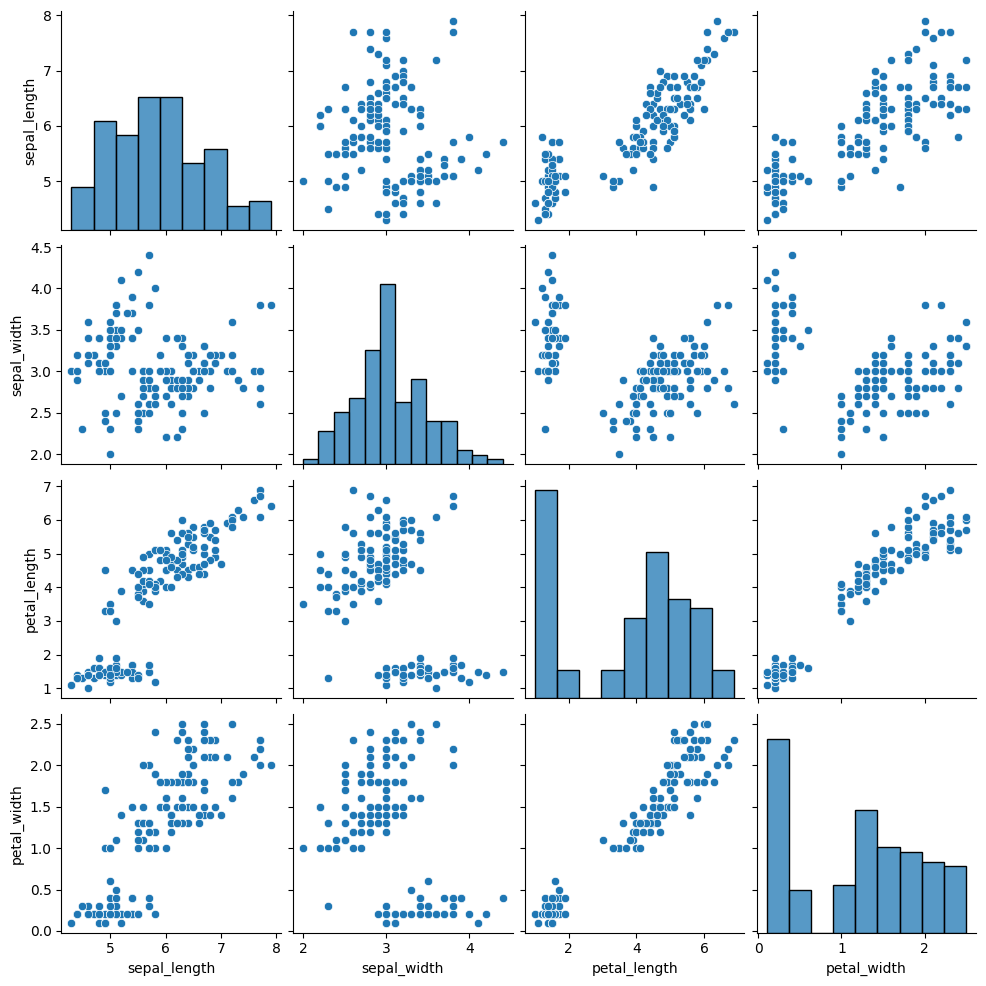

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(df4)
plt.show()

<Figure size 2000x1500 with 0 Axes>

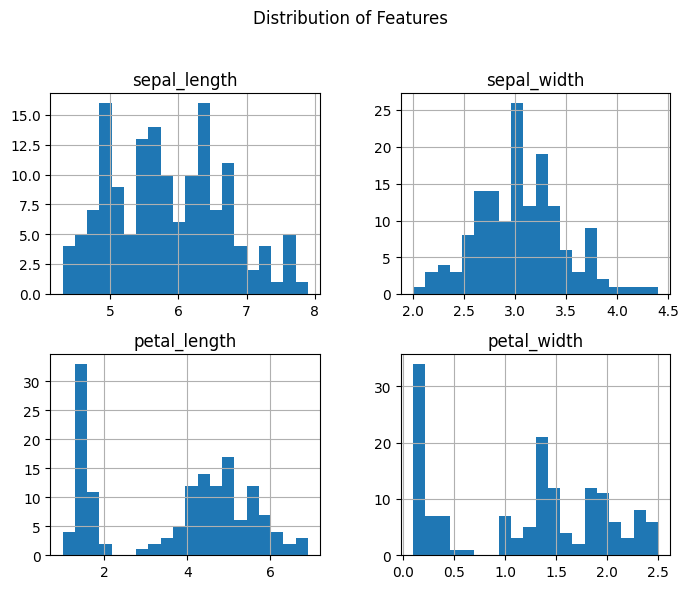

In [ ]:
plt.figure(figsize=(20, 15))
df4.hist(bins=20, figsize=(8, 6))
plt.suptitle('Distribution of Features', y=1.02)
plt.show()

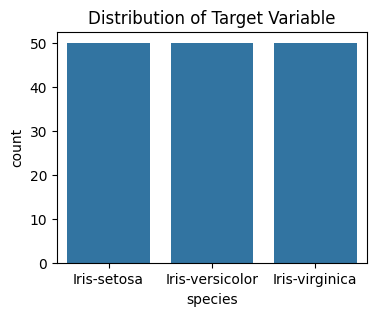

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df4, x='species')
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
X = df4.iloc[:,:-1]
y = df4.iloc[:,-1]

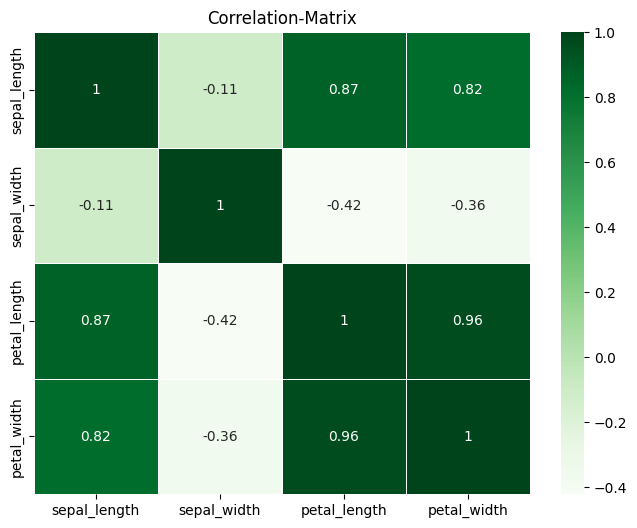

In [ ]:
corr_m = df4.iloc[:,:-1].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_m, annot=True,cmap="Greens",linewidths=0.5)
plt.title('Correlation-Matrix')
plt.show()

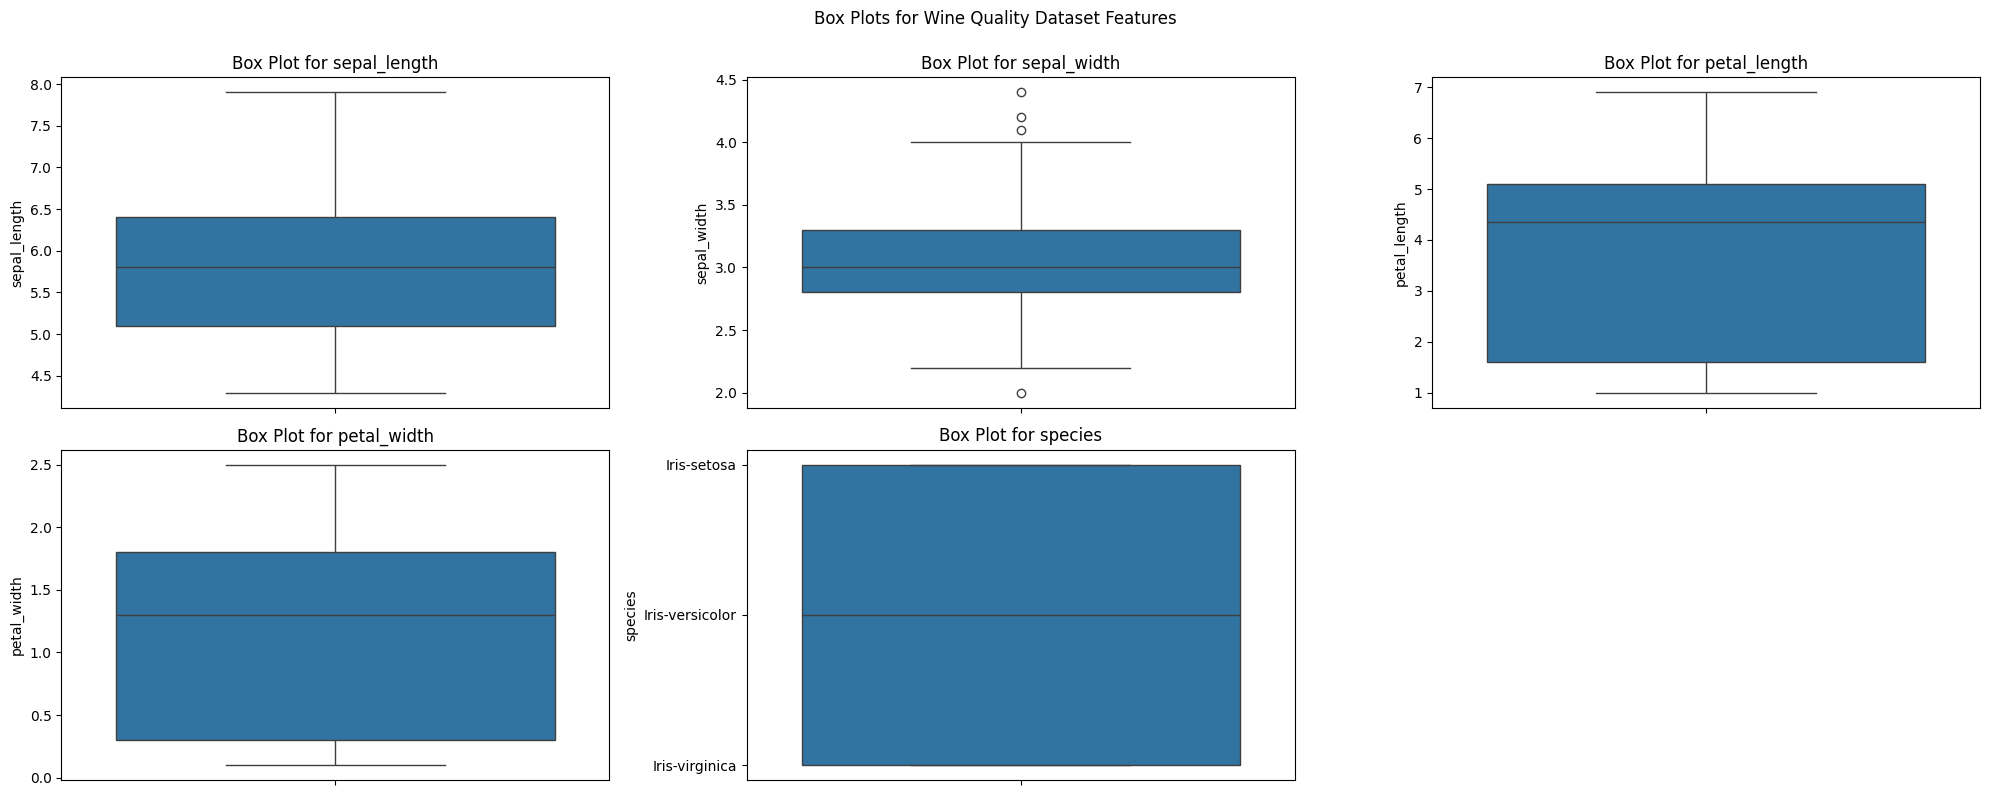

In [ ]:
# Set the size of the plot
plt.figure(figsize=(20, 15))

# Create box plots for each feature
for i, column in enumerate(df4.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df4, y=column)
    plt.title(f'Box Plot for {column}')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.suptitle('Box Plots for Wine Quality Dataset Features', y=1.02)
plt.show()

# DecisionTreeClassifier

In [ ]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model building and Training the model with datasets
DTC_model = DecisionTreeClassifier(random_state=42)
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

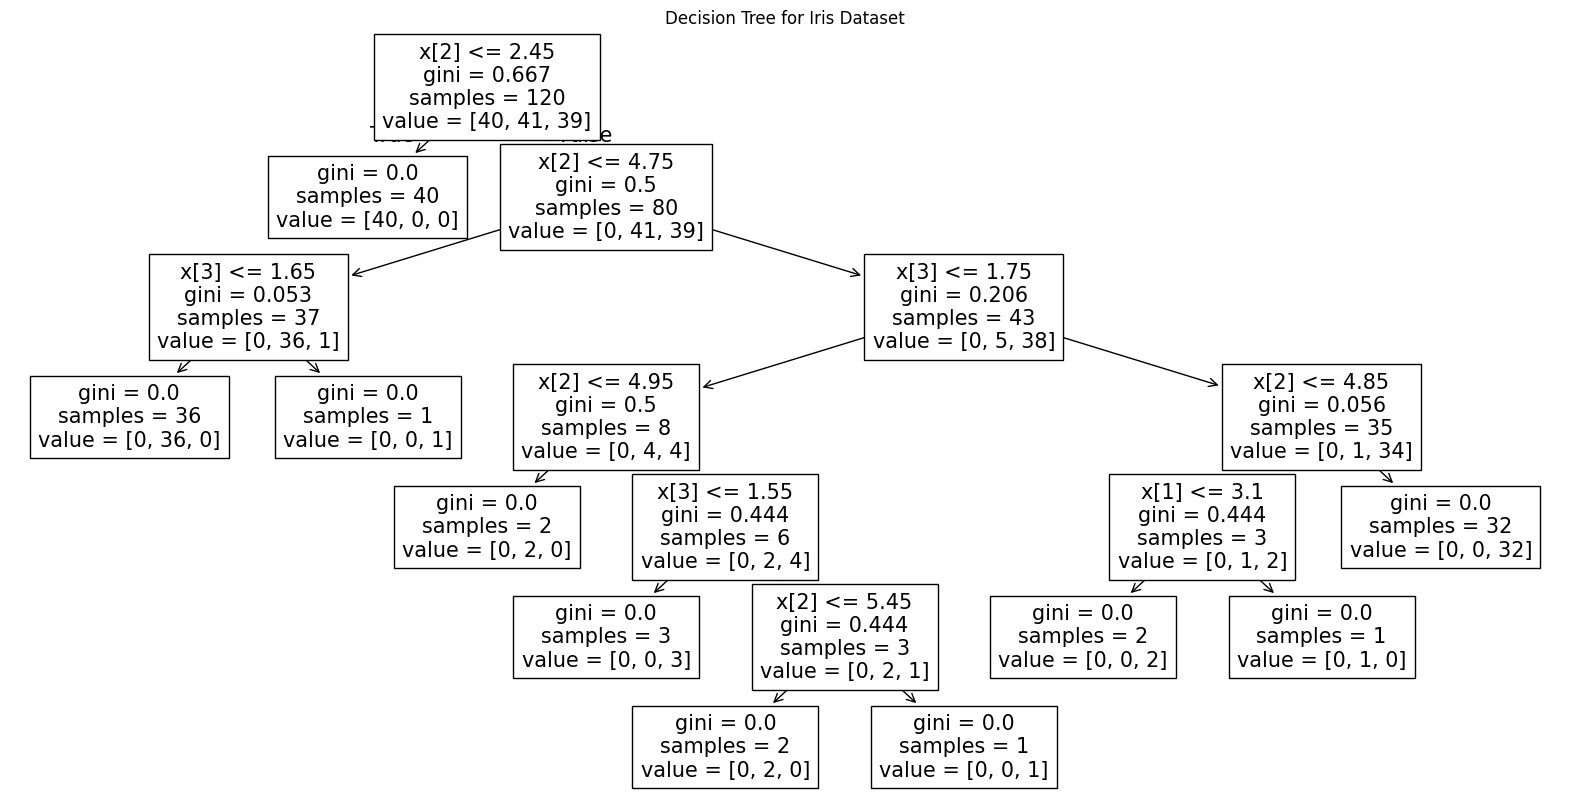

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(DTC_model)
plt.title('Decision Tree for Iris Dataset')
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.10      0.11        10
           5       0.71      0.73      0.72       130
           6       0.57      0.58      0.58       132
           7       0.51      0.48      0.49        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.60      0.60      0.60       320

Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 0  1  5  4  0  0]
 [ 2  3 95 30  0  0]
 [ 1  4 31 77 17  2]
 [ 0  0  2 19 20  1]
 [ 0  0  0  3  2  0]]
Accuracy: 60.31%


# Conclusion
In this project, we successfully built and evaluated a classification model using the Iris dataset. Through data preprocessing, exploratory data analysis, and model training, we identified key patterns and relationships among the features. The final model demonstrated high accuracy in classifying iris species, showcasing the effectiveness of machine learning techniques in botanical classification tasks. This project highlights the importance of feature selection and model evaluation in achieving robust and accurate predictions.

# Decision-Tree-Regressor

## winequality-red dataset
# Problem Statement
The objective of this project is to develop a Decision Tree Regressor model to predict the quality of red wine based on its physicochemical properties. By using the Wine Quality Red dataset, we aim to perform thorough data analysis, build a robust predictive model, and evaluate its effectiveness in predicting wine quality.

In [ ]:
# loading the dataset
DTR = pd.read_csv("winequality-red.csv")
DTR

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
DTR.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
DTR.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define independent variables (X) and dependent variable (y)
X = DTR.iloc[:, :-1]  # All columns except the last one
y = DTR.iloc[:, -1]   # The last column (quality)

In [ ]:
# splitting the data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# MOdel building and fitting the data into the model
DecisionTreeRegressor_model = DecisionTreeRegressor(random_state=42)
DecisionTreeRegressor_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# predicting the model on X_test dataset
y1_pred = DecisionTreeRegressor_model.predict(X_test)


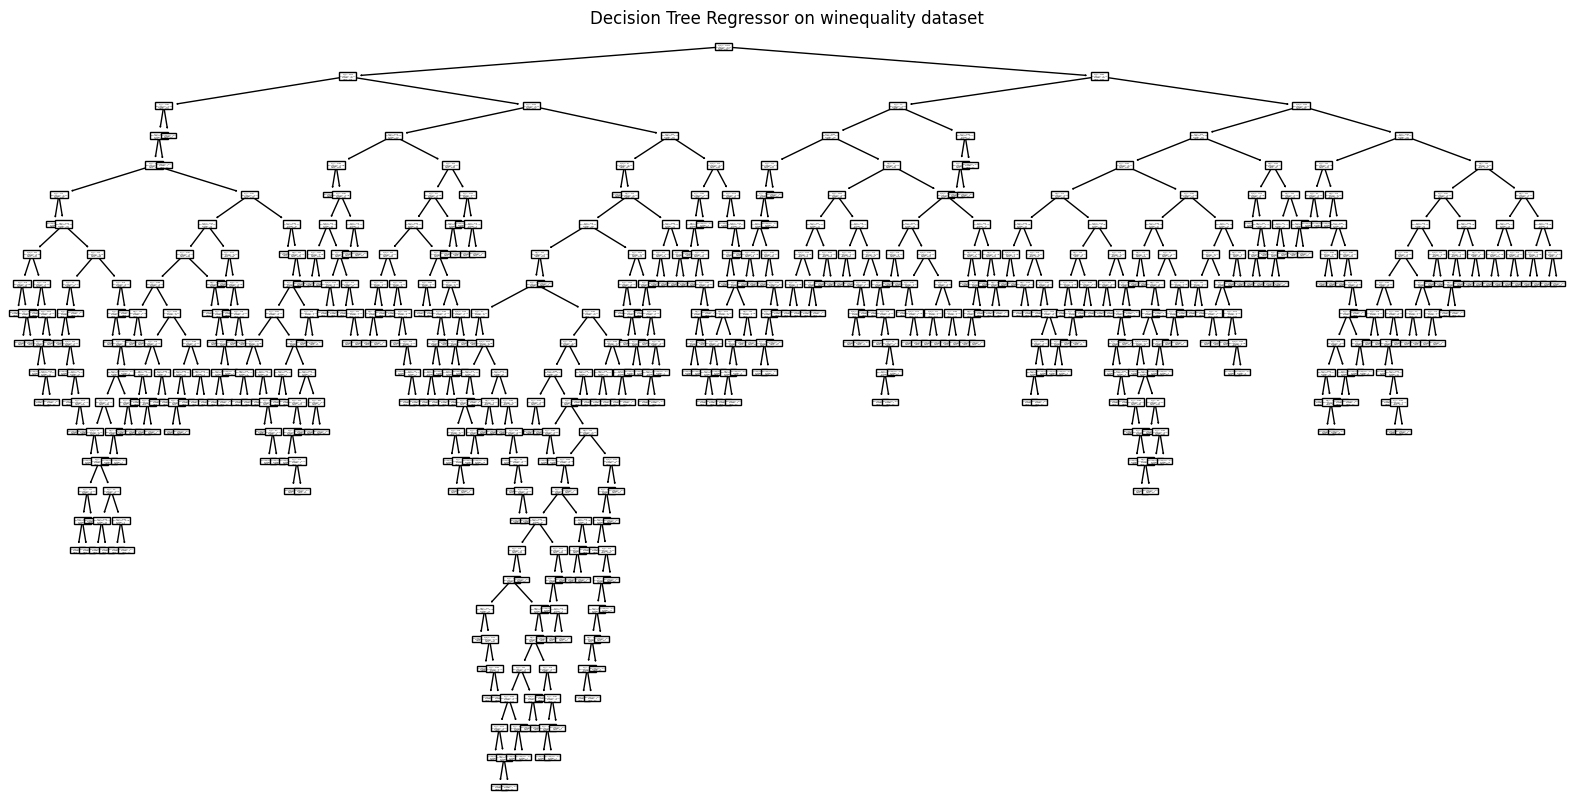

In [ ]:
# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(DecisionTreeRegressor_model)
plt.title("Decision Tree Regressor on winequality dataset")
plt.show()

In [ ]:
# predicting the model on X_train dataset also
y2_pred = DecisionTreeRegressor_model.predict(X_train)

In [ ]:
# mean squared error on test dataset
mse = mean_squared_error(y_test,y1_pred)
print(f"Mean Squared Error: {mse}")
# r2 score on test dataset
r2 = r2_score(y_test,y1_pred)
print(f"R-square : {r2}")

Mean Squared Error: 0.60625
R-square : 0.07231130172297862


In [ ]:
# Calculate error metrics for training set
train_mse = mean_squared_error(y_train, y2_pred)
train_r2 = r2_score(y_train, y2_pred)
print(f"Training MSE: {train_mse}")
print(f"Training R-squared: {train_r2}")

Training MSE: 0.0
Training R-squared: 1.0


Mean Error (ME): 0.0375
Mean Absolute Error (MAE): 0.4625
Mean Squared Error (MSE): 0.60625
Root Mean Squared Error (RMSE): 0.7786205751198718
Mean Percentage Error (MPE): -0.37723214285714296
Mean Absolute Percentage Error (MAPE): 8.30580357142857
R-squared: 0.07231130172297862


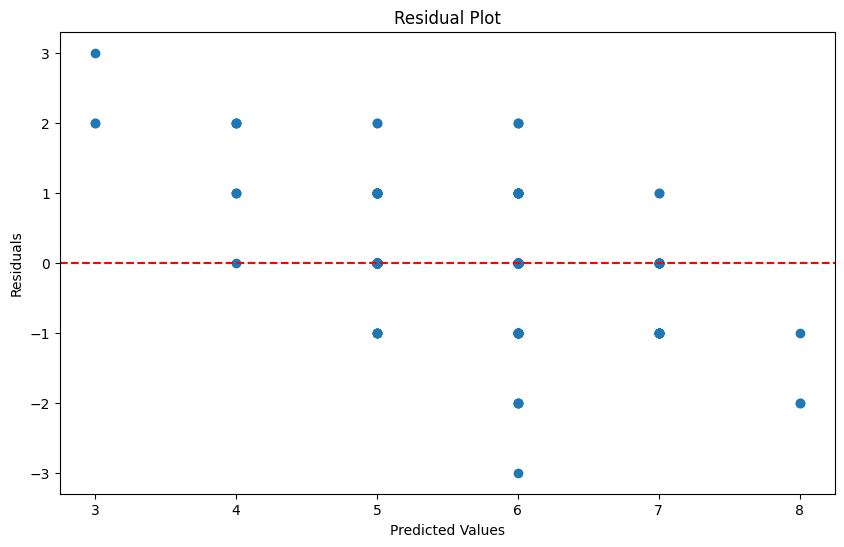

In [ ]:
# Error Metrics
from sklearn.metrics import mean_absolute_error
me = np.mean(y_test - y1_pred)
mae = mean_absolute_error(y_test, y1_pred)
mse = mean_squared_error(y_test, y1_pred)
rmse = np.sqrt(mse)
mpe = np.mean((y_test - y1_pred) / y_test) * 100
mape = np.mean(np.abs((y_test - y1_pred) / y_test)) * 100

print(f"Mean Error (ME): {me}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Percentage Error (MPE): {mpe}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# R-squared
r2 = r2_score(y_test, y1_pred)
print(f"R-squared: {r2}")

# Residuals
residuals = y_test - y1_pred
plt.figure(figsize=(10, 6))
plt.scatter(y1_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


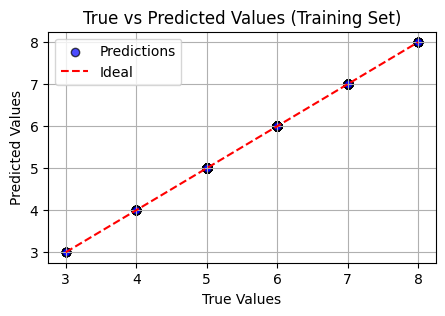

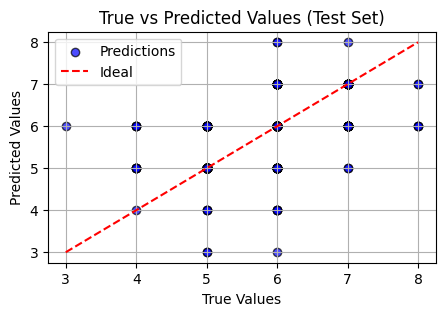

In [ ]:
# Function to plot true vs. predicted values
def plot_true_vs_predicted(y_true, y_pred, dataset_type):
    plt.figure(figsize=(5, 3))
    plt.scatter(y_true, y_pred, c='blue', marker='o', edgecolor='k', alpha=0.7, label='Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'True vs Predicted Values ({dataset_type} Set)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for training set
plot_true_vs_predicted(y_train, y2_pred, 'Training')

# Plot for test set
plot_true_vs_predicted(y_test, y1_pred, 'Test')


In [ ]:
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

# Cross-Validation
cv_scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-Validation RMSE: {np.mean(cv_rmse_scores)}')

# Additional Statistical Metrics
X_const = sm.add_constant(X_test)
ols_model = sm.OLS(y_test, X_const).fit()
print(ols_model.summary())


Cross-Validation RMSE: 0.9087177819592572
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     20.86
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.89e-31
Time:                        01:57:41   Log-Likelihood:                -296.92
No. Observations:                 320   AIC:                             617.8
Df Residuals:                     308   BIC:                             663.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

# Conclusion
In this project, we successfully developed and evaluated a Decision Tree Regressor to predict wine quality. Through extensive data preprocessing and exploratory data analysis, we identified key features influencing wine quality. The model's performance, assessed using metrics such as Mean Squared Error (MSE) and R-squared, demonstrated its capability to accurately predict wine quality. This project highlights the importance of machine learning techniques in improving quality predictions in the food and beverage industry.